(439, 780, 3)


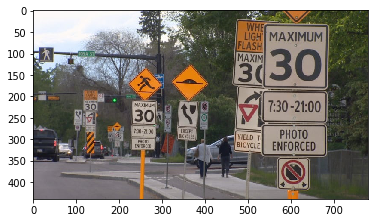

In [12]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read stop1.jpg as sample_img and display
sample_img = cv2.imread('signs1.jpg')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
print (sample_img.shape)
plt.imshow(sample_img)
plt.show()


In [13]:

# Convert to HSV
hsv_img = cv2.cvtColor(sample_img, cv2.COLOR_RGB2HSV)

# Get 2 different shades of red and obtain mask to detect any reds in-between
lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
mask0 = cv2.inRange(hsv_img, lower_red, upper_red)

lower_red = (170, 50, 50)
upper_red = (180, 255, 255)
mask1 = cv2.inRange(hsv_img, lower_red, upper_red)

loose_mask = mask0 + mask1

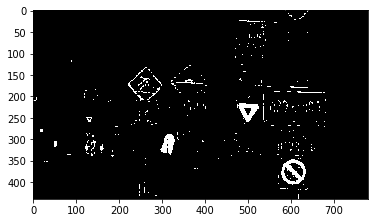

In [14]:
# Display mask
plt.imshow(loose_mask, cmap='gray')
plt.show()




In [15]:
# TODO strict segmentation

ret,thresh = cv2.threshold(loose_mask,125,255,0)
_,contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

sorted_contour = sorted(contours, key=cv2.contourArea)[-3:]
size = sample_img.shape
m = sample_img
#np.zeros(size, dtype=np.uint8)

for i, cnt in enumerate(sorted_contour):
    color = (0,255,0)
    cv2.drawContours(m, cnt, -1, color, thickness=2)

#cv2.imwrite("contours.jpg", m);


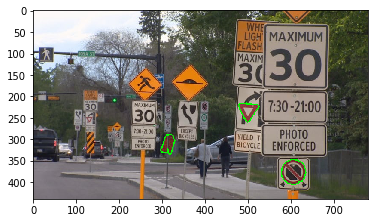

In [16]:
# Display result
plt.imshow(m)
plt.show()